Mounting to drives

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


loading in packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import seaborn as seaborn

In [ ]:
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, f1_score, classification_report, roc_curve, auc, roc_auc_score


In [ ]:
# Ticker
# SimFinId_x
# Currency_x
# Fiscal Year	- one year period of time that a company uses for accounting purposes/preperation of financial statements
# Fiscal Period_x	- special period for previous year
# Report Date_x	- irrelevant seemingly
# Publish Date_x	- irrelevant seemingly
# Restated Date_x - irrelevant seemingly
# Shares (Basic)_x	- stock held by all shareholders
# Shares (Diluted)_x	- total shares if the convertible securities (security that can be converted into a different security. A security is any financial instrument with money value) of a company were performed
# Revenue	- Revenue is the total income a company is able to generate in a period
# Cost of Revenue	- the total cost of manufacturing and delivering a product or service to consumers. The cost of getting the revenue
# Gross Profit - profit basically
# Operating Expenses
# Selling General & Administrative	- costs of doing business
# Research & Development	- i
# Depreciation & Amortization_x
#Operating  Income (Loss)	- takes a company's gross income and subtracts all operating expenses
# Non-Operating Income (Loss)	- portion of org's income that is derived from activities not related to core business operations
# Interest Expense Net	- interest expense minus interest income
# Pretax Income (Loss) - net income earned by business before taxes are accounted for
# Adj.	Abnormal Gains (Losses)	- if actual production units are more than anticipated units after deducting normal loss. Difference is abnormal gain. Basically the R coefficient lol.
# Pretax Income (Loss)	-
# Income Tax (Expense)
# Benefit Net	Income (Loss) from Continuing Operations
# Net Extraordinary Gains (Losses)
# Net Income	- sales minus cost of goods sold
# Net Income (Common)
# Net Income
# SimFinId_y
# Currency_y
# Fiscal Period_y
# Report Date_y
# Publish Date_y
# Restated Date_y
# Shares (Basic)_y
# Shares (Diluted)_y
# Cash
# Cash Equivalents & Short Term Investments	- short term investment securities with maturity periods of 90 days or less
# Accounts & Notes
# Receivable
# Inventories	- all the items, goods, merchandise, and materials held by a business for selling in the market to earn a profit.
# Total Current Assets
# Property Plant & Equipment Net	- long term assets vital to business operations
# Long Term Investments & Receivables	 - receivables are the debts owed to a company due more than twelve months from last recorded date
# Other Long Term Assets
# Total Noncurrent Assets	Total Assets
# Payables & Accruals	- accruals are earned revenues and incurred expenses that have yet to be received or paid
# Short Term Debt
# Total Current Liabilities
# Long Term Debt
# Total Noncurrent Liabilities
# Total Liabilities	Share Capital & Additional Paid-In Capital
# Treasury
# Stock
# Retained Earnings
# Total Equity
# Total Liabilities & Equity
# SimFinId
# Currency
# Fiscal Period
# Report Date
# Publish Date
# Restated Date
# Shares (Basic)
# Shares (Diluted)
# Net Income/Starting Line
# Depreciation & Amortization_y
# Non-Cash Items
# Change in Working - net affect on cash flows of adding/subtracting from current assets and current liabilities.
# Capital	Change in Accounts -
# Receivable	Change in Inventories	- increase/decrease in cash that cusotmers owe the company
# Change in Accounts Payable	- money owed by a company to its creditors.
# Change in Other	Net Cash from Operating Activities - basically the money that services the company performs gain
# Change in Fixed Assets & Intangibles	- fixed assets lose value as they age, tangible assets have periodic depreciation
# Net Change in Long Term Investment
# Net Cash from Acquisitions & Divestitures	- divestiture is selling off subsidiary business interests/investments.
# Net Cash from Investing Activities	- cash flow statement that shows cash generated/spent relating to investment activities
# Dividends Paid	- payments a company makes to share profits with stockholders. https://www.nerdwallet.com/article/investing/what-are-dividends#:~:text=Dividends%20are%20payments%20a%20company,return%20from%20investing%20in%20stock.
#^^^
# Cash from (Repayment of) Debt
# Cash from (Repurchase of) Equity	= cash equity is the liquid portion of asset that can be converted to cash. This is calculating the amount of cash from the cash equity.
# Net Cash from Financing Activities = amount of funding a company generates in a given time period
# Net Change in Cash = difference between prior trading period's closing price and current trading period's closing price

loading in data

In [ ]:
income = pd.read_csv('/content/drive/MyDrive/us-income-annual.csv')
balance = pd.read_csv('/content/drive/MyDrive/us-balance-annual.csv')
cashflow = pd.read_csv('/content/drive/MyDrive/us-cashflow-annual.csv')
income.head()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),Interest Expense Net,Pretax Income (Loss) Adj.,Abnormal Gains (Losses),Pretax Income (Loss),Income Tax (Expense) Benefit Net,Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
0,A,45846,USD,2016,FY,10/31/2016,12/20/2016,12/20/2018,326000000.0,329000000.0,...,-71000000.0,-61000000.0,544000000.0,NaN,544000000.0,-82000000.0,4.620000e+08,NaN,4.620000e+08,4.620000e+08
1,A,45846,USD,2017,FY,10/31/2017,12/21/2017,12/20/2018,322000000.0,326000000.0,...,-38000000.0,-57000000.0,803000000.0,NaN,803000000.0,-119000000.0,6.840000e+08,NaN,6.840000e+08,6.840000e+08
2,A,45846,USD,2018,FY,10/31/2018,12/20/2018,12/18/2020,321000000.0,325000000.0,...,42000000.0,-37000000.0,946000000.0,NaN,946000000.0,-630000000.0,3.160000e+08,NaN,3.160000e+08,3.160000e+08
3,A,45846,USD,2019,FY,10/31/2019,12/19/2019,12/17/2021,314000000.0,318000000.0,...,-22000000.0,-38000000.0,919000000.0,NaN,919000000.0,152000000.0,1.071000e+09,NaN,1.071000e+09,1.071000e+09
4,A,45846,USD,2020,FY,10/31/2020,12/18/2020,12/17/2021,309000000.0,312000000.0,...,-4000000.0,-70000000.0,842000000.0,NaN,842000000.0,-123000000.0,7.190000e+08,NaN,7.190000e+08,7.190000e+08


joinng financial statements

In [ ]:
df1 = income.merge(balance, left_on=['Ticker', 'Fiscal Year'], right_on=['Ticker', 'Fiscal Year']); df1.drop_duplicates()
df2 = df1.merge(cashflow, left_on=['Ticker', 'Fiscal Year'], right_on=['Ticker', 'Fiscal Year']); df2.drop_duplicates()
DATA = df2.copy()
DATA.head()

,Ticker,SimFinId_x,Currency_x,Fiscal Year,Fiscal Period_x,Report Date_x,Publish Date_x,Restated Date_x,Shares (Basic)_x,Shares (Diluted)_x,...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
0,A,45846,USD,2016,FY,10/31/2016,12/20/2016,12/20/2018,326000000.0,329000000.0,...,7.930000e+08,-139000000.0,1000000.0,-2.610000e+08,-2.380000e+08,-150000000.0,262000000.0,-372000000.0,-268000000.0,286000000.0
1,A,45846,USD,2017,FY,10/31/2017,12/21/2017,12/20/2018,322000000.0,326000000.0,...,8.890000e+08,-176000000.0,0.0,-1.260000e+08,-3.050000e+08,-170000000.0,110000000.0,-128000000.0,-202000000.0,389000000.0
2,A,45846,USD,2018,FY,10/31/2018,12/20/2018,12/18/2020,321000000.0,325000000.0,...,1.087000e+09,-176000000.0,NaN,-5.160000e+08,-7.050000e+08,-191000000.0,-210000000.0,-366000000.0,-797000000.0,-432000000.0
3,A,45846,USD,2019,FY,10/31/2019,12/19/2019,12/17/2021,314000000.0,318000000.0,...,1.021000e+09,-155000000.0,NaN,-1.408000e+09,-1.590000e+09,-206000000.0,600000000.0,-669000000.0,-299000000.0,-866000000.0
4,A,45846,USD,2020,FY,10/31/2020,12/18/2020,12/17/2021,309000000.0,312000000.0,...,9.210000e+08,-118000000.0,NaN,NaN,-1.470000e+08,-222000000.0,-45000000.0,-409000000.0,-717000000.0,59000000.0


In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11175 entries, 0 to 11174
Data columns (total 82 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Ticker                                          11175 non-null  object 
 1   SimFinId_x                                      11175 non-null  int64  
 2   Currency_x                                      11175 non-null  object 
 3   Fiscal Year                                     11175 non-null  int64  
 4   Fiscal Period_x                                 11175 non-null  object 
 5   Report Date_x                                   11175 non-null  object 
 6   Publish Date_x                                  11175 non-null  object 
 7   Restated Date_x                                 11175 non-null  object 
 8   Shares (Basic)_x                                11003 non-null  float64
 9   Shares (Diluted)_x                     

In [ ]:
DATA.columns

Index(['Ticker', 'SimFinId_x', 'Currency_x', 'Fiscal Year', 'Fiscal Period_x',
       'Report Date_x', 'Publish Date_x', 'Restated Date_x',
       'Shares (Basic)_x', 'Shares (Diluted)_x', 'Revenue', 'Cost of Revenue',
       'Gross Profit', 'Operating Expenses',
       'Selling General & Administrative', 'Research & Development',
       'Depreciation & Amortization_x', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense  Net',
       'Pretax Income (Loss)  Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income', 'Net Income (Common)',
       'SimFinId_y', 'Currency_y', 'Fiscal Period_y', 'Report Date_y',
       'Publish Date_y', 'Restated Date_y', 'Shares (Basic)_y',
       'Shares (Diluted)_y', 'Cash Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total C

Caculate Investment Metrics

In [ ]:
DATA['Current Ratio'] = DATA['Total Current Assets']/DATA['Total Current Liabilities']
DATA['LTD-to-Earnings'] = DATA['Long Term Debt']/DATA['Net Income']
DATA['ROE'] = DATA['Net Income']/(DATA['Total Assets']-DATA['Total Liabilities'])
DATA['Debt-to-EBIT'] = (DATA['Long Term Debt'] + DATA['Short Term Debt']) /DATA['Pretax Income (Loss)']
DATA['Interest Coverage Ratio'] = DATA['Net Income']/DATA['Interest Expense  Net']

In [ ]:
DATA.head()

,Ticker,SimFinId_x,Currency_x,Fiscal Year,Fiscal Period_x,Report Date_x,Publish Date_x,Restated Date_x,Shares (Basic)_x,Shares (Diluted)_x,...,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,Current Ratio,LTD-to-Earnings,ROE,Debt-to-EBIT,Interest Coverage Ratio
0,A,45846,USD,2016,FY,10/31/2016,12/20/2016,12/20/2018,326000000.0,329000000.0,...,-150000000.0,262000000.0,-372000000.0,-268000000.0,286000000.0,3.846561,4.121212,0.108808,3.500000,-7.573770
1,A,45846,USD,2017,FY,10/31/2017,12/21/2017,12/20/2018,322000000.0,326000000.0,...,-170000000.0,110000000.0,-128000000.0,-202000000.0,389000000.0,3.300871,2.633041,0.141468,2.504359,-12.000000
2,A,45846,USD,2018,FY,10/31/2018,12/20/2018,12/18/2020,321000000.0,325000000.0,...,-191000000.0,-210000000.0,-366000000.0,-797000000.0,-432000000.0,3.286080,5.693038,0.069131,1.901691,-8.540541
3,A,45846,USD,2019,FY,10/31/2019,12/19/2019,12/17/2021,314000000.0,318000000.0,...,-206000000.0,600000000.0,-669000000.0,-299000000.0,-866000000.0,1.533173,1.672269,0.225569,2.619151,-28.184211
4,A,45846,USD,2020,FY,10/31/2020,12/18/2020,12/17/2021,309000000.0,312000000.0,...,-222000000.0,-45000000.0,-409000000.0,-717000000.0,59000000.0,2.327880,3.176634,0.147548,2.801663,-10.271429


In [ ]:
DATA['Success'] = np.where((DATA['Current Ratio']>1)& (DATA['LTD-to-Earnings']<5) & (DATA['ROE']>0.12)  & (DATA['Debt-to-EBIT']<3), 1, 0)


In [ ]:
DATA.head()

,Ticker,SimFinId_x,Currency_x,Fiscal Year,Fiscal Period_x,Report Date_x,Publish Date_x,Restated Date_x,Shares (Basic)_x,Shares (Diluted)_x,...,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,Current Ratio,LTD-to-Earnings,ROE,Debt-to-EBIT,Interest Coverage Ratio,Success
0,A,45846,USD,2016,FY,10/31/2016,12/20/2016,12/20/2018,326000000.0,329000000.0,...,262000000.0,-372000000.0,-268000000.0,286000000.0,3.846561,4.121212,0.108808,3.500000,-7.573770,0
1,A,45846,USD,2017,FY,10/31/2017,12/21/2017,12/20/2018,322000000.0,326000000.0,...,110000000.0,-128000000.0,-202000000.0,389000000.0,3.300871,2.633041,0.141468,2.504359,-12.000000,1
2,A,45846,USD,2018,FY,10/31/2018,12/20/2018,12/18/2020,321000000.0,325000000.0,...,-210000000.0,-366000000.0,-797000000.0,-432000000.0,3.286080,5.693038,0.069131,1.901691,-8.540541,0
3,A,45846,USD,2019,FY,10/31/2019,12/19/2019,12/17/2021,314000000.0,318000000.0,...,600000000.0,-669000000.0,-299000000.0,-866000000.0,1.533173,1.672269,0.225569,2.619151,-28.184211,1
4,A,45846,USD,2020,FY,10/31/2020,12/18/2020,12/17/2021,309000000.0,312000000.0,...,-45000000.0,-409000000.0,-717000000.0,59000000.0,2.327880,3.176634,0.147548,2.801663,-10.271429,1


In [ ]:
DATA=DATA[['Current Ratio', 'LTD-to-Earnings', 'ROE', 'Debt-to-EBIT','Interest Coverage Ratio', 'Success']]
DATA.replace([np.inf, -np.inf], np.nan, inplace=True) # this code
DATA=DATA.dropna() #drop missing values
DATA.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Current Ratio,LTD-to-Earnings,ROE,Debt-to-EBIT,Interest Coverage Ratio,Success
0,3.846561,4.121212,0.108808,3.500000,-7.573770,0
1,3.300871,2.633041,0.141468,2.504359,-12.000000,1
2,3.286080,5.693038,0.069131,1.901691,-8.540541,0
3,1.533173,1.672269,0.225569,2.619151,-28.184211,1
4,2.327880,3.176634,0.147548,2.801663,-10.271429,1


In [ ]:
DATA.head()
DATA.shape

(6230, 6)

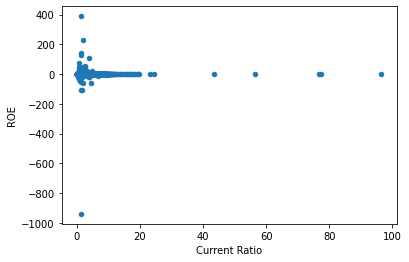

In [ ]:
DATA.plot.scatter('Current Ratio', 'ROE')

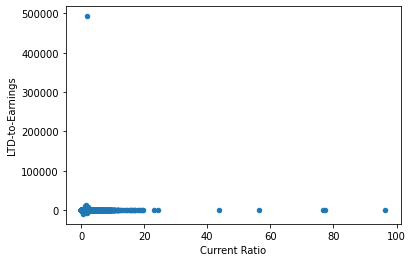

In [ ]:
DATA.plot.scatter('Current Ratio', 'LTD-to-Earnings')

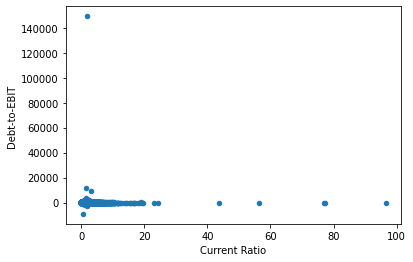

In [ ]:
DATA.plot.scatter('Current Ratio','Debt-to-EBIT')

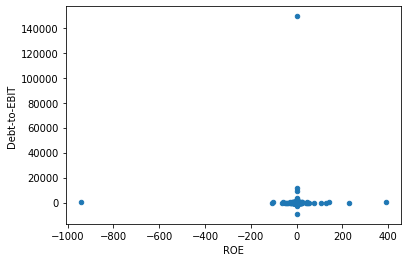

In [ ]:
DATA.plot.scatter('ROE','Debt-to-EBIT')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efda6f9d910>]],
      dtype=object)

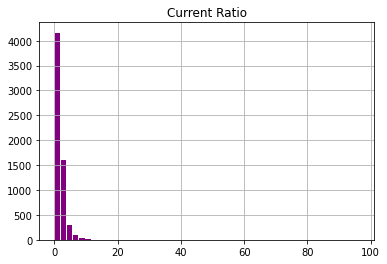

In [ ]:
DATA.hist(column='Current Ratio', bins=50, grid=True, rwidth=.9
          , color='purple')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efda6fb4cd0>]],
      dtype=object)

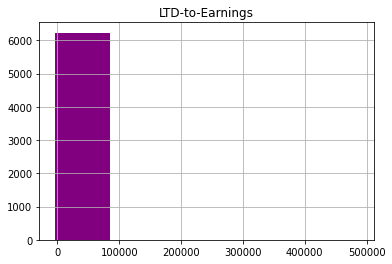

In [ ]:
DATA.hist(column='LTD-to-Earnings', bins=5, grid=True, rwidth=.9, color='purple')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efda6dea430>]],
      dtype=object)

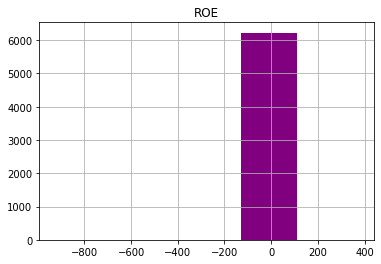

In [ ]:
DATA.hist(column='ROE', bins=5, grid=True, rwidth=.9, color='purple')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efda6dd3430>]],
      dtype=object)

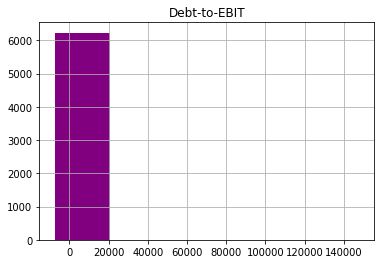

In [ ]:
DATA.hist(column='Debt-to-EBIT', bins=5, grid=True, rwidth=.9, color='purple')

AxesSubplot(0.1,0.15;0.8x0.75)


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


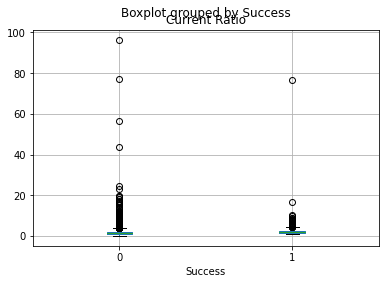

In [ ]:
boxplot = DATA.boxplot('Current Ratio' , by = 'Success')
print(boxplot)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


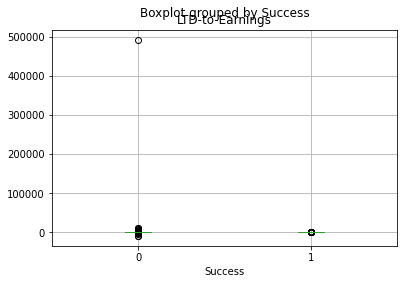

In [ ]:
boxplot = DATA.boxplot('LTD-to-Earnings' , by = 'Success')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


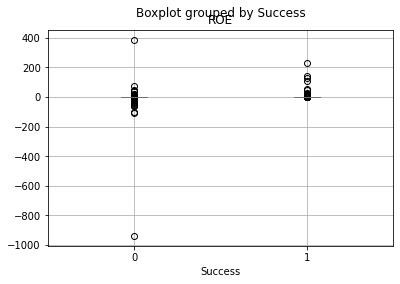

In [ ]:
boxplot = DATA.boxplot('ROE' , by = 'Success')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


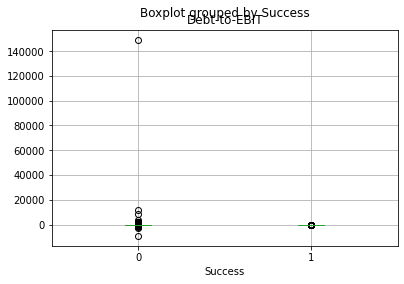

In [ ]:
boxplot = DATA.boxplot('Debt-to-EBIT' , by = 'Success')

In [ ]:
DATA.describe()

,Current Ratio,LTD-to-Earnings,ROE,Debt-to-EBIT,Interest Coverage Ratio,Success
count,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000,6230.000000
mean,1.960218,87.865574,-0.000479,31.932053,-14.159463,0.146549
std,2.586758,6249.189067,13.930258,1906.693767,952.051424,0.353684
min,0.000000,-9709.741935,-940.882353,-9147.117647,-67289.531915,0.000000
25%,1.037107,-0.319520,-0.043864,-0.419571,-5.875071,0.000000
50%,1.511090,2.955407,0.084133,2.976297,-1.886895,0.000000
75%,2.271927,8.086950,0.185061,7.694581,0.892199,0.000000
max,96.454663,492592.747326,388.700000,149250.173649,25747.700612,1.000000


In [ ]:
FEATURES = ['Current Ratio', 'LTD-to-Earnings', 'ROE', 'Debt-to-EBIT','Interest Coverage Ratio']
RESPONSE = 'Success'
newDATA = DATA.copy()
for f in FEATURES:
	q_low = newDATA[f].quantile(0.01) # identifying threshold for the bottom 1%
	q_hi  = newDATA[f].quantile(0.99) # identifying threshold for the top 1%

	df_filtered = newDATA[(newDATA[f] < q_hi) & (newDATA[f] > q_low)]

Label Balancing

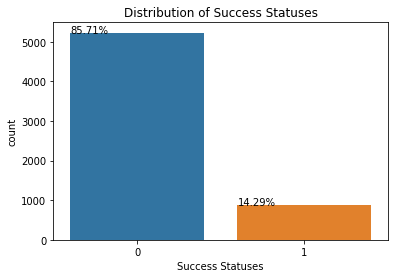

In [ ]:
import seaborn as sns

ax = sns.countplot(x = "Success", data = df_filtered) # plot the countplot
plt.title('Distribution of Success Statuses')# add a title
plt.xlabel('Success Statuses') # label x as Success Statuses
total = len(df_filtered["Success"]) # total =
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # this is just scaling the graph?
        x_coord = p.get_x() #
        y_coord = p.get_y() + p.get_height()+0.02 # increase the bar heights by .02
        ax.annotate(percentage, (x_coord, y_coord))


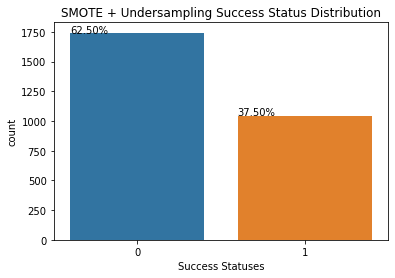

In [ ]:
from collections import Counter # counts hashable objects
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique.
# smote balances class distribution by randomly increasing minority class examples + replicating them

from imblearn.under_sampling import RandomUnderSampler #
# diference between randomundersampler vs smote: smote creates new artificial training examples to increase size of dataset. under sampler
# does the exact opposite

from imblearn.pipeline import Pipeline # sequence of data processing mechanisms.
from numpy import where
FEATURES = df_filtered.columns[:-1]; RESPONSE = DATA.columns[-1]
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.6) # increase the observations for class 1 so that they are closer to class 0. So it will be a fair prediction.
# we are trying to increase the amount of companies that are successful (duplicating the samples, redrawing from them) so we can

# increased the successful
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset

X_SMOTE, y_SMOTE = pipeline.fit_resample(df_filtered.loc[:, FEATURES], df_filtered.loc[:, RESPONSE])

# plotting label distribution after SMOTE
ax = sns.countplot(x='Success', data = pd.DataFrame(y_SMOTE))
plt.title('SMOTE + Undersampling Success Status Distribution')
plt.xlabel('Success Statuses')
total = len(y_SMOTE)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x()
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))

In [ ]:
DATA_NEW=pd.concat([X_SMOTE, y_SMOTE], axis=1) # 5 columns we will use to predict the outcome
DATA_NEW


,Current Ratio,LTD-to-Earnings,ROE,Debt-to-EBIT,Interest Coverage Ratio,Success
0,0.825258,20.891362,-0.131222,11.092567,-0.897682,0
1,0.609247,10.645033,-0.161652,12.567976,-1.449798,0
2,1.077736,-0.007646,-6.051103,-0.061062,133.708784,0
3,3.076256,0.764622,0.053438,-1.251241,-30.956086,0
4,1.700701,3.536409,0.137031,3.211887,-11.110553,0
...,...,...,...,...,...,...
2784,1.959866,0.126012,0.190191,0.132326,-102.976230,1
2785,1.435974,1.475857,0.520787,1.625763,-18.610165,1
2786,1.780117,0.974716,0.315939,0.852951,-10.463168,1
2787,1.629907,0.837688,0.253403,0.952719,-18.796585,1


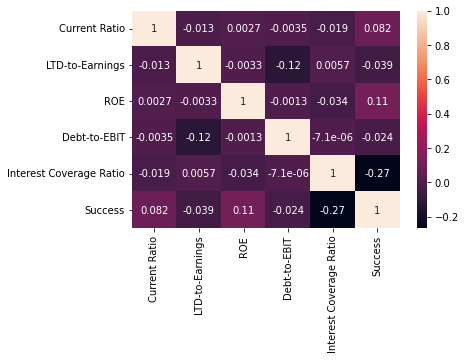

In [ ]:
sns.heatmap(DATA_NEW.corr(),annot=True)


Feature Importance

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DATA_NEW.loc[:, FEATURES], DATA_NEW.loc[:, RESPONSE], test_size=0.2, random_state=0)


In [ ]:
y_train.head()

487     0
2027    1
438     0
1759    1
1669    0
Name: Success, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier # importing the random forest module

rf_model = RandomForestClassifier(random_state=0) # define the random forest model

rf_model.fit(X_train, y_train) # fit the random forest model

importances = rf_model.feature_importances_ # get importance

indices = np.argsort(importances) # sort the features' index by their importance scores


Text(0.5, 0, 'Relative Importance')

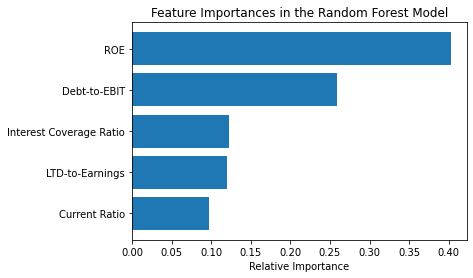

In [ ]:
plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')


Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state = 0).fit(X_train,y_train)

prediction = lr_model.predict(X_test)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

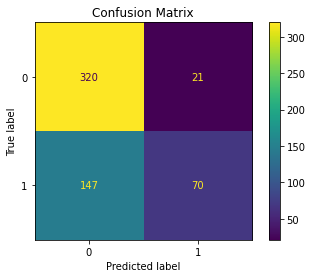

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr_model, X_test, y_test)
plt.title("Confusion Matrix")


In [ ]:
print('training accuracy score:', lr_model.score(X_train,y_train))
print('testing accuracy score:', lr_model.score(X_test,y_test))


training accuracy score: 0.7261317794710892
testing accuracy score: 0.6989247311827957


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       0.69      0.94      0.79       341
           1       0.77      0.32      0.45       217

    accuracy                           0.70       558
   macro avg       0.73      0.63      0.62       558
weighted avg       0.72      0.70      0.66       558



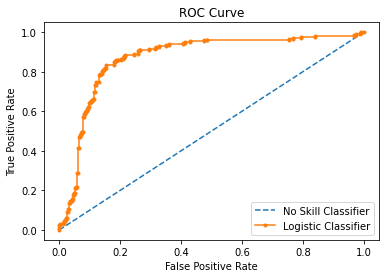

In [ ]:
from sklearn.metrics import roc_curve
lr_probs = lr_model.predict_proba(X_test) # calculate the probabilities of the class for the test dataset using ‘predict_proba’
# generate a positive direction prediction (majority class)
ns_probs = [1 for _ in range(len(y_test))]
# keep probabilities for the positive direction only
lr_probs = lr_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill Classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Classifier')
# axis labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [ ]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill Classifier: ROC AUC=%.3f' % (ns_auc))
print('Logistic Classifier: ROC AUC=%.3f' % (lr_auc))

No Skill Classifier: ROC AUC=0.500
Logistic Classifier: ROC AUC=0.871


KNN Model

In [ ]:
# importing KNN algorithm
from sklearn.neighbors import KNeighborsClassifier


# K value set to be 6
knn_model = KNeighborsClassifier(n_neighbors=6)

# model training
knn_model.fit(X_train,y_train)

# testing the model
KNN_Prediction = knn_model.predict(X_test)





/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'KNN Confusion Matrix')

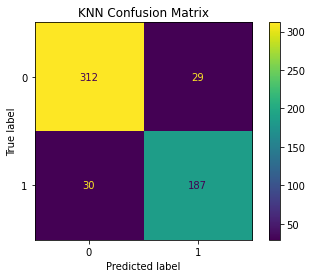

In [ ]:
plot_confusion_matrix(knn_model, X_test,y_test)
plt.title("KNN Confusion Matrix")

In [ ]:
print('training accuracy score:', knn_model.score(X_train,y_train))
print('testing accuracy score:', knn_model.score(X_test,y_test))

training accuracy score: 0.9143881667413716
testing accuracy score: 0.8942652329749103


In [ ]:
print(classification_report(y_test,KNN_Prediction))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       341
           1       0.87      0.86      0.86       217

    accuracy                           0.89       558
   macro avg       0.89      0.89      0.89       558
weighted avg       0.89      0.89      0.89       558



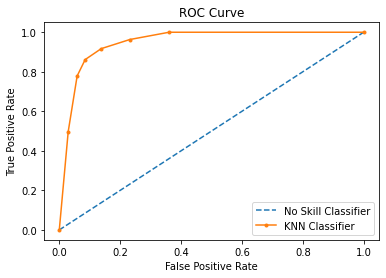

In [ ]:
knn_probs = knn_model.predict_proba(X_test) # calculate the probabilities of the class for the test dataset using ‘predict_proba’
# generate a positive direction prediction (majority class)
ns_probs = [1 for _ in range(len(y_test))]
# keep probabilities for the positive direction only
knn_probs = knn_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill Classifier')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN Classifier')
# axis labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
ns_auc = roc_auc_score(y_test, ns_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
# summarize scores
print('No Skill Classifier: ROC AUC=%.3f' % (ns_auc))
print('Logistic Classifier: ROC AUC=%.3f' % (knn_auc))

No Skill Classifier: ROC AUC=0.500
Logistic Classifier: ROC AUC=0.949


Random Forest Model

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rf_model = RandomForestClassifier()

# fit the model
rf_model.fit(X_train, y_train)

# testing the model
RF_Prediction = rf_model.predict(X_test)



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

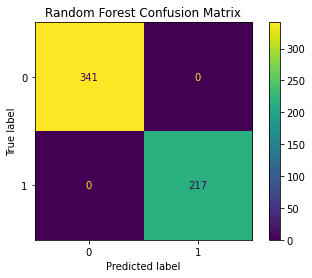

In [ ]:
plot_confusion_matrix(rf_model, X_test,y_test)
plt.title("Random Forest Confusion Matrix")

In [ ]:
print('training accuracy score:', rf_model.score(X_train,y_train))
print('testing accuracy score:', rf_model.score(X_test,y_test))

training accuracy score: 1.0
testing accuracy score: 1.0


In [ ]:
print(classification_report(y_test,RF_Prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       341
           1       1.00      1.00      1.00       217

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558



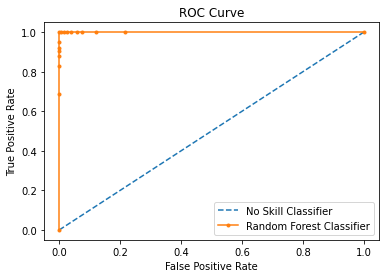

In [ ]:
rf_probs = rf_model.predict_proba(X_test) # calculate the probabilities of the class for the test dataset using ‘predict_proba’
# generate a positive direction prediction (majority class)
ns_probs = [1 for _ in range(len(y_test))]
# keep probabilities for the positive direction only
rf_probs = rf_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill Classifier')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest Classifier')
# axis labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('No Skill Classifier: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (rf_auc))

No Skill Classifier: ROC AUC=0.500
Random Forest Classifier: ROC AUC=1.000


Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

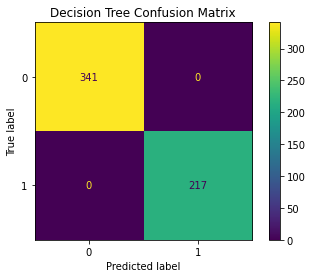

In [ ]:
plot_confusion_matrix(dt_model, X_test,y_test)
plt.title("Decision Tree Confusion Matrix")

In [ ]:
print('training accuracy score:', dt_model.score(X_train,y_train))
print('testing accuracy score:', dt_model.score(X_test,y_test))

training accuracy score: 1.0
testing accuracy score: 1.0


In [ ]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       341
           1       1.00      1.00      1.00       217

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558



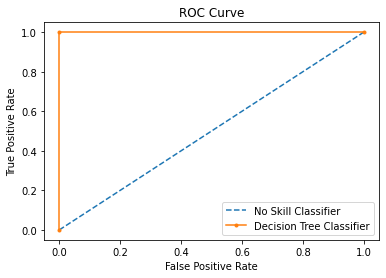

In [ ]:
dt_probs = dt_model.predict_proba(X_test) # calculate the probabilities of the class for the test dataset using ‘predict_proba’
# generate a positive direction prediction (majority class)
ns_probs = [1 for _ in range(len(y_test))]
# keep probabilities for the positive direction only
dt_probs = dt_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill Classifier')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree Classifier')
# axis labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
# summarize scores
print('No Skill Classifier: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree Classifier: ROC AUC=%.3f' % (dt_auc))

No Skill Classifier: ROC AUC=0.500
Decision Tree Classifier: ROC AUC=1.000


Boosting Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)
adaboost_pred = adaboost.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Adaptive Boosting Confusion Matrix')

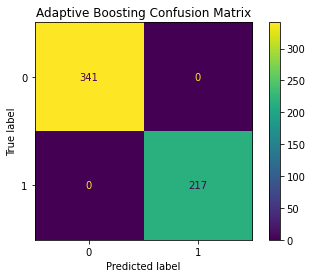

In [ ]:
plot_confusion_matrix(dt_model, X_test,y_test)
plt.title("Adaptive Boosting Confusion Matrix")

In [ ]:
print('training accuracy score:', adaboost.score(X_train,y_train))
print('testing accuracy score:', adaboost.score(X_test,y_test))

training accuracy score: 1.0
testing accuracy score: 0.9982078853046595


In [ ]:
print(classification_report(y_test,adaboost_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       341
           1       1.00      1.00      1.00       217

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558



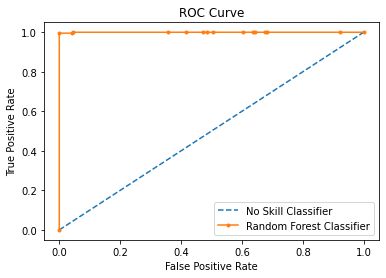

In [ ]:
adaboost_probs = adaboost.predict_proba(X_test) # calculate the probabilities of the class for the test dataset using ‘predict_proba’
# generate a positive direction prediction (majority class)
ns_probs = [1 for _ in range(len(y_test))]
# keep probabilities for the positive direction only
adaboost_probs = adaboost_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill Classifier')
plt.plot(adaboost_fpr, adaboost_tpr, marker='.', label='Random Forest Classifier')
# axis labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, adaboost_probs)
# summarize scores
print('No Skill Classifier: ROC AUC=%.3f' % (ns_auc))
print('Adaptive Boost Classifier: ROC AUC=%.3f' % (dt_auc))

No Skill Classifier: ROC AUC=0.500
Adaptive Boost Classifier: ROC AUC=1.000
